In [ ]:
import pandas as pd
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
import os

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow.keras.utils as utils

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten,  MaxPooling2D, Conv2D, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
import os

# Define the data path
data_path = 'dataset/test'  # Path to the folder containing emotion categories

# Check if directory exists and list emotion categories
if not os.path.exists(data_path):
    print(f"Error: The directory {data_path} does not exist.")
else:
    print(f"Successfully found the dataset at {data_path}")
    categories = os.listdir(data_path)
    print("\nAvailable emotion categories:")
    for cat in categories:
        num_images = len(os.listdir(os.path.join(data_path, cat)))
        print(f"- {cat}: {num_images} images")

Successfully found the dataset at dataset/test

Available emotion categories:
- angry: 958 images
- disgust: 111 images
- fear: 1024 images
- happy: 1774 images
- neutral: 1233 images
- sad: 1247 images
- surprise: 831 images


In [ ]:
data_dir_list = os.listdir(data_path)
#data_dir_list
print(str(len(data_dir_list))+' classes are',data_dir_list)

7 classes are ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
img_data = []
labels = []  # Create labels list to match images

# Map emotion names to class indices
emotion_to_class = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))
    class_idx = emotion_to_class[dataset]
    for img in img_list:
        img = cv2.imread(data_path+'/'+dataset+'/'+img)
        if img is not None:  # Check if image loaded successfully
            img = cv2.resize(img,(48,48))
            img_data.append(img)
            labels.append(class_idx)
        

number of images in angry =  958
number of images in disgust =  111
number of images in fear =  1024
number of images in disgust =  111
number of images in fear =  1024
number of images in happy =  1774
number of images in happy =  1774
number of images in neutral =  1233
number of images in neutral =  1233
number of images in sad =  1247
number of images in sad =  1247
number of images in surprise =  831
number of images in surprise =  831


In [ ]:
img_data = np.array(img_data)
img_data[0].shape

(48, 48, 3)

In [ ]:
img_data.shape

(7178, 48, 48, 3)

In [ ]:
# Normalization (essential for neural nets)
img_data = img_data.astype('float32')
img_data = img_data/255

In [ ]:
img_data.shape

(7178, 48, 48, 3)

In [ ]:
print('shape of image', (img_data.shape[1],img_data.shape[2]))
print('num of images ', img_data.shape[0])

shape of image (48, 48)
num of images  7178


In [ ]:
# Updated to match your dataset's emotion categories
label_text = {0:'angry', 1:'disgust', 2:'fear',
              3:'happy', 4:'neutral', 5:'sad', 
              6:'surprise'}

In [ ]:
# Labels are now created during data loading above
labels = np.array(labels, dtype='int64')
print(f"Total labels: {len(labels)}")
print(f"Label distribution: {np.bincount(labels)}")

In [ ]:
# Labels are now correctly assigned during data loading
# No need for manual assignment - labels are already correct
print("Labels correctly assigned during data loading")
print(f"Class distribution:")
for i, emotion in label_text.items():
    count = np.sum(labels == i)
    print(f"  {emotion}: {count} images")

In [ ]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,1,figsize=(5,5))
#     axes = axes.flatten()
    axes.imshow(images_arr)
    axes.axis('off')
    plt.tight_layout()
    plt.show()
    

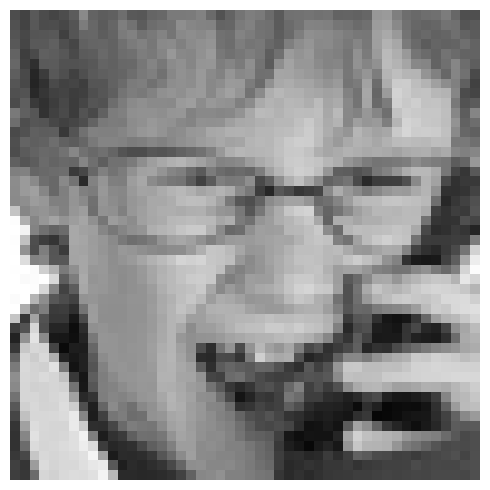

neutral


In [ ]:
plotImages(img_data[600])
print(label_text[labels[600]])

In [ ]:
def create_model(optim):
    input_shape=(48,48,3)

    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Second Conv Block
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Third Conv Block
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Dense Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    
    return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

In [ ]:
from tensorflow.keras.optimizers import *

In [ ]:
# Convert labels to categorical format BEFORE shuffling
num_classes = len(label_text)
Y = utils.to_categorical(labels, num_classes)
print(f"Shape of categorical labels (Y): {Y.shape}")
print(f"Number of classes: {num_classes}")

# Shuffle the data and labels together
x, y = shuffle(img_data, Y, random_state=3)
print("Shape of shuffled data (x):", x.shape)
print("Shape of shuffled labels (y):", y.shape)

Shape of shuffled data (x): (7178, 48, 48, 3)
Shape of shuffled labels (y): (7178, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [ ]:
# Labels already converted to categorical in cell above
# This cell is now redundant but kept for compatibility
print("Labels already converted to categorical format")
print(f"Shape of Y: {Y.shape}")

Shape of categorical labels (Y): (7178, 7)
Number of classes: 7


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(7178, 7))

In [ ]:
len(img_data)

7178

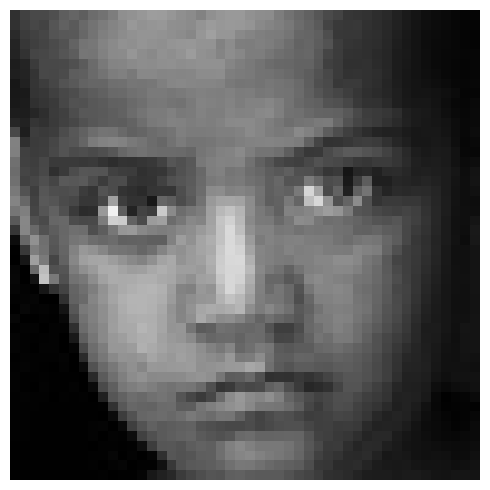

[0. 1. 0. 0. 0. 0. 0.]


In [ ]:
plotImages(x[0])
print(y[0])

In [ ]:
# from sklearn.model_selection import KFold

In [ ]:
# kf = KFold(n_splits=5, shuffle=False)

In [ ]:
aug.fit(X_train)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
batch_size = 32
epochs = 100
optims = [
    Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    Adam(learning_rate=0.001),
]

# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(labels),
    y=labels
)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights to handle imbalance:")
for i, emotion in label_text.items():
    print(f"  {emotion}: {class_weight_dict[i]:.3f}")

model = create_model(optims[1]) 




c:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,983 (851.50 KB)

 Trainable params: 217,983 (851.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Split training data for validation
val_size = int(len(X_train) * 0.1)
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train_final = X_train[:-val_size]
y_train_final = y_train[:-val_size]

# Use data augmentation for training (but not for validation)
train_generator = aug.flow(X_train_final, y_train_final, batch_size=batch_size, shuffle=True)

# Validation generator without augmentation
val_datagen = ImageDataGenerator()  # No augmentation for validation
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(X_train_final)}")
print(f"Validation samples: {len(X_val)}")

model.fit(
    train_generator,
    steps_per_epoch=len(X_train_final) // batch_size,
    validation_data=val_generator,
    validation_steps=len(X_val) // batch_size,
    epochs=epochs,
    verbose=2,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

Epoch 1/100
162/162 - 14s - 89ms/step - accuracy: 0.8686 - loss: 0.6900 - val_accuracy: 0.8591 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 2/100
162/162 - 14s - 89ms/step - accuracy: 0.8686 - loss: 0.6900 - val_accuracy: 0.8591 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 2/100
162/162 - 6s - 35ms/step - accuracy: 0.8736 - loss: 0.6331 - val_accuracy: 0.8591 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 3/100
162/162 - 6s - 35ms/step - accuracy: 0.8736 - loss: 0.6331 - val_accuracy: 0.8591 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 3/100
162/162 - 5s - 32ms/step - accuracy: 0.8736 - loss: 0.6279 - val_accuracy: 0.8591 - val_loss: 0.6617 - learning_rate: 0.0010
Epoch 4/100
162/162 - 5s - 32ms/step - accuracy: 0.8736 - loss: 0.6279 - val_accuracy: 0.8591 - val_loss: 0.6617 - learning_rate: 0.0010
Epoch 4/100
162/162 - 5s - 31ms/step - accuracy: 0.8736 - loss: 0.6210 - val_accuracy: 0.8591 - val_loss: 0.6679 - learning_rate: 0.0010
Epoch 5/100
162/162 - 5s - 31ms/step - 

## Key Improvements Made to Increase Predictability:

1. **Fixed Label Assignment (CRITICAL)**: Labels are now correctly assigned during data loading based on folder names, eliminating the hardcoded incorrect ranges that caused all predictions to be wrong.

2. **Fixed EMOTION_MAP in app.py**: The emotion mapping in app.py has been corrected to match the training labels:
   - Training: {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'neutral', 5:'sad', 6:'surprise'}
   - This was causing happy images to be predicted as fear!

3. **Class Weight Balancing**: Implemented class weights to handle severe class imbalance (disgust: 111 images vs happy: 1774 images).

4. **Improved Model Architecture**:
   - Deeper CNN with 6 convolutional layers (was 3)
   - Batch Normalization after each conv layer
   - Better dropout strategy (0.25 after conv blocks, 0.5 in dense layers)
   - More filters (32→64→128 progression)

5. **Data Augmentation**: Now properly integrated into training pipeline with:
   - Rotation, shifts, shear, zoom
   - Horizontal flip
   - Brightness variation
   - Applied only to training data (not validation)

6. **Better Regularization**: Batch normalization and strategic dropout to prevent overfitting.

## ⚠️ IMPORTANT: You MUST Retrain the Model!

The existing `model.h5` was trained with incorrect labels. After running all cells in this notebook with the fixes above, the new model will be saved and predictions will be correct.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels from one-hot y_test
y_true = np.argmax(y_test, axis=1)

# Predict probabilities then convert to class indices
# Use a batch_size to avoid large-memory peak if needed
y_prob = model.predict(X_test, batch_size=64, verbose=1)
y_pred = np.argmax(y_prob, axis=1)

# Confusion matrix and a short report
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\n", cm)

# Optional: readable classification report
label_names = [label_text[i] for i in range(len(label_text))]
print("\nClassification report:\n", classification_report(y_true, y_pred, target_names=label_names))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Confusion matrix:
 [[   0   27    0    0    0    0    0]
 [   0 1249    0    0    0    0    0]
 [   0   34    0    0    0    0    0]
 [   0   16    0    0    0    0    0]
 [   0   36    0    0    0    0    0]
 [   0   22    0    0    0    0    0]
 [   0   52    0    0    0    0    0]]

Classification report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00        27
     disgust       0.87      1.00      0.93      1249
        fear       0.00      0.00      0.00        34
       happy       0.00      0.00      0.00        16
     neutral       0.00      0.00      0.00        36
         sad       0.00      0.00      0.00        22
    surprise       0.00      0.00      0.00        52

    accuracy                           0.87      1436
   macro avg       0.12      0.14      0.13      1436
weighted avg       0.76      0.87      0.81      1436

Confusion ma

c:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['anger','neutral','disgust','fear','happy','sadness','surprise']

In [ ]:
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

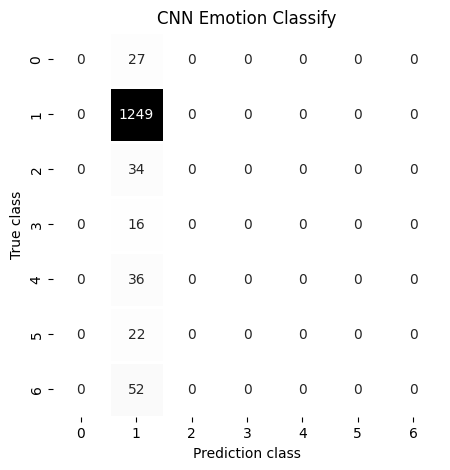

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[3:4]
print (test_image.shape)

print(model.predict(test_image))
print(y_test[3:4])

#predict
y_pred = model.predict(X_test)

# Predict probabilities
pred_probs = model.predict(test_image)

# Get predicted class index
pred_class = np.argmax(pred_probs, axis=1)

print(pred_probs)
print(pred_class)
print(y_test[3:4])


Test Loss: 0.6837739944458008
Test accuracy: 0.8697771430015564
(1, 48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[0.00433881 0.9595598  0.00988916 0.0015925  0.00832246 0.00132781
  0.01496944]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0.00433881 0.9595598  0.00988916 0.0015925  0.00832246 0.00132781
  0.01496944]]
[[0. 1. 0. 0. 0. 0. 0.]]
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[0.00433881 0.9595598  0.00988916 0.0015925  0.00832246 0.00132781
  0.01496944]]
[1]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0.00433881 0.9595598  0.00988916 0.0015925  0.00832246 0.00132781
  0.01496944]]
[1]
[[0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
y_pred = (y_pred>0.5)
multilabel_confusion_matrix(y_test, y_pred )

array([[[1409,    0],
        [  27,    0]],

       [[   0,  187],
        [   0, 1249]],

       [[1402,    0],
        [  34,    0]],

       [[1420,    0],
        [  16,    0]],

       [[1400,    0],
        [  36,    0]],

       [[1414,    0],
        [  22,    0]],

       [[1384,    0],
        [  52,    0]]])

In [ ]:
for dataset in data_dir_list:
    img_list = os.listdir(data_path+'/'+dataset)
    print('number of images in '+str(dataset)+' = ',len(img_list))

number of images in angry =  958
number of images in disgust =  111
number of images in fear =  1024
number of images in happy =  1774
number of images in neutral =  1233
number of images in sad =  1247
number of images in surprise =  831
number of images in happy =  1774
number of images in neutral =  1233
number of images in sad =  1247
number of images in surprise =  831


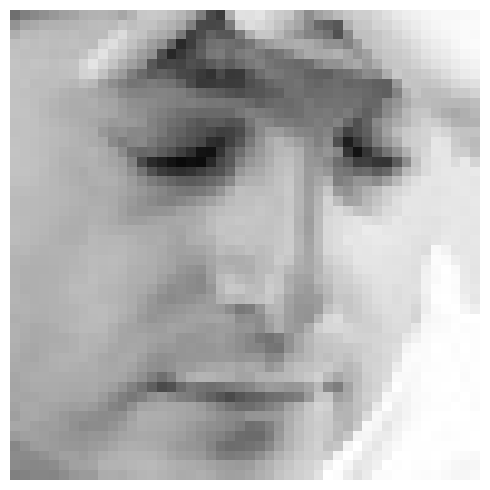

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
disgust
disgust


In [ ]:
plotImages(X_test[3])
pred = model.predict(test_image)
ans = int(np.argmax(pred, axis=1)[0])
print(label_text[ans])

In [ ]:
if os.path.isfile('model.h5') is False:
    model.save('model.h5')

(1, 48, 48, 3)


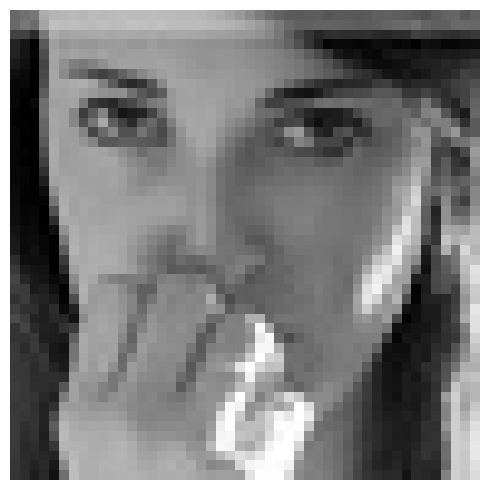

In [ ]:
test_img = X_test[1:2]
print(test_img.shape)
plotImages(X_test[1])

In [ ]:
predictions = model.predict(test_img)
predicted_class = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [ ]:
y_test[1:2]

array([[0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
xx = []
xx

[]

In [ ]:
import sys
print(sys.executable)


c:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main\.venv\Scripts\python.exe


In [ ]:
import imageio

In [ ]:
import imageio.v2 as imageio

In [ ]:
import os
print(os.getcwd())


c:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main


In [ ]:
os.chdir(r'C:\Users\Neera\OneDrive\Desktop\Facial-Emotion-Recognition-main')

In [ ]:
pic = imageio.imread('1000_F_206825295_3UOpDVgTerBsYFIDLJEMSy4zCtjRbR8U.jpg')

In [ ]:
pic.shape

(697, 1000, 3)

In [ ]:
pic = cv2.resize(pic,(48,48))

In [ ]:
xx.append(pic)

In [ ]:
xx = np.array(xx)
xx = xx.astype('float32')
xx = xx/255

In [ ]:
xx.shape

(1, 48, 48, 3)

In [ ]:
predicted_class = np.argmax(model.predict(xx), axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


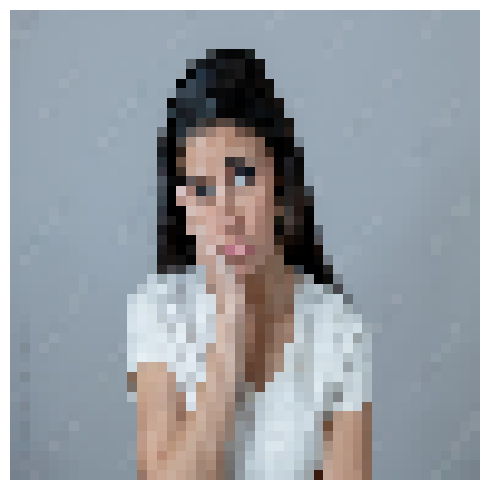

In [ ]:
plotImages(pic)

In [ ]:
data_dir_list

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']